In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
comp='shannon'
import sys  # update paths
sys.path.append('../../')

sys.path.append('../')

import numpy as np 
import matplotlib.pyplot as plt

import scresonators.fit_resonator.ana_tls as ana_tls
import scresonators.measurement.handy as hy
import seaborn as sns

colors = ["#454c7c", '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
#folder = 'Shared drives/SLab/JJ_fab/Coherence Sample/'
pth = os.path.join(pth_base,folder)
img_pth = os.path.join(pth,'Outputs/Resonators/')
meas = 'silta6_res1c2'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:

params, data_pth, img_name = hy.get_params('mini.yml', meas, pth=pth)

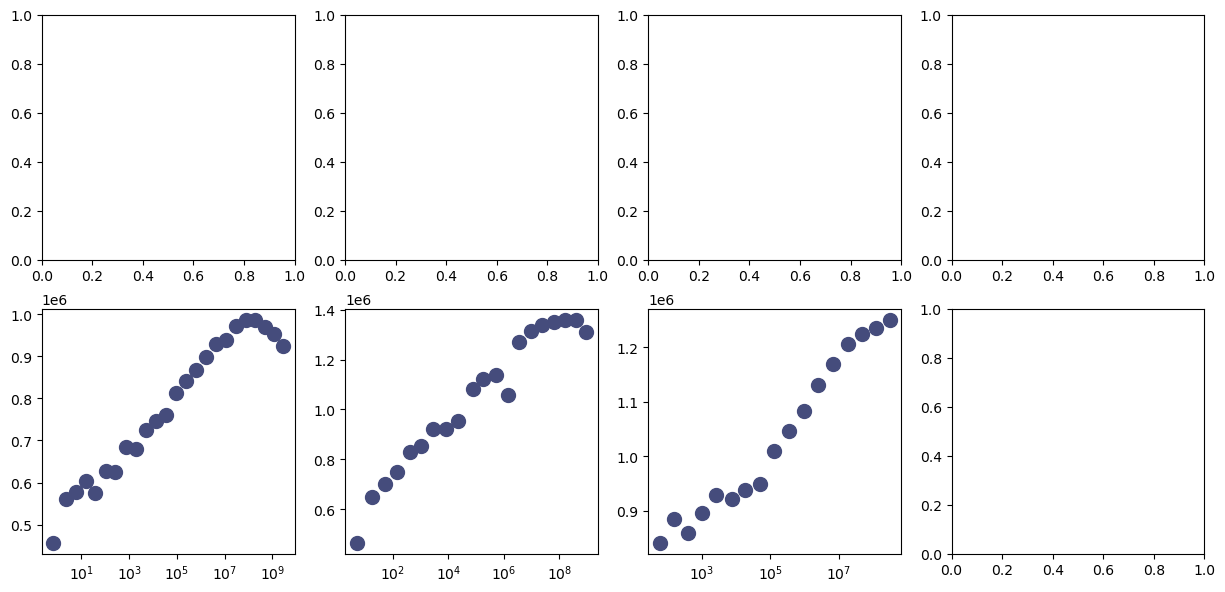

In [24]:

import pandas as pd
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]
csv_files_in_dir = [f for f in os.listdir(data_pth) if f.endswith('.csv')]
csv_files_in_dir.sort()
    #print(csv_files_in_dir)
for i, csv_file in enumerate(csv_files_in_dir):
    file_path = os.path.join(data_pth, csv_file)
    df = pd.read_csv(file_path)

    df['pitch']=params['pitch'][i]
    df['target_freq']=params['target_freq'][i]
    df['resonator_id'] = i
    df['temp']=0.04
    df_full = pd.concat([df_full, df], ignore_index=True)
    ax[ord[i]].semilogx(df['photon_number'], df['q_internal_alt'],'o')


In [25]:
df_full = df_full.sort_values(by='pitch')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


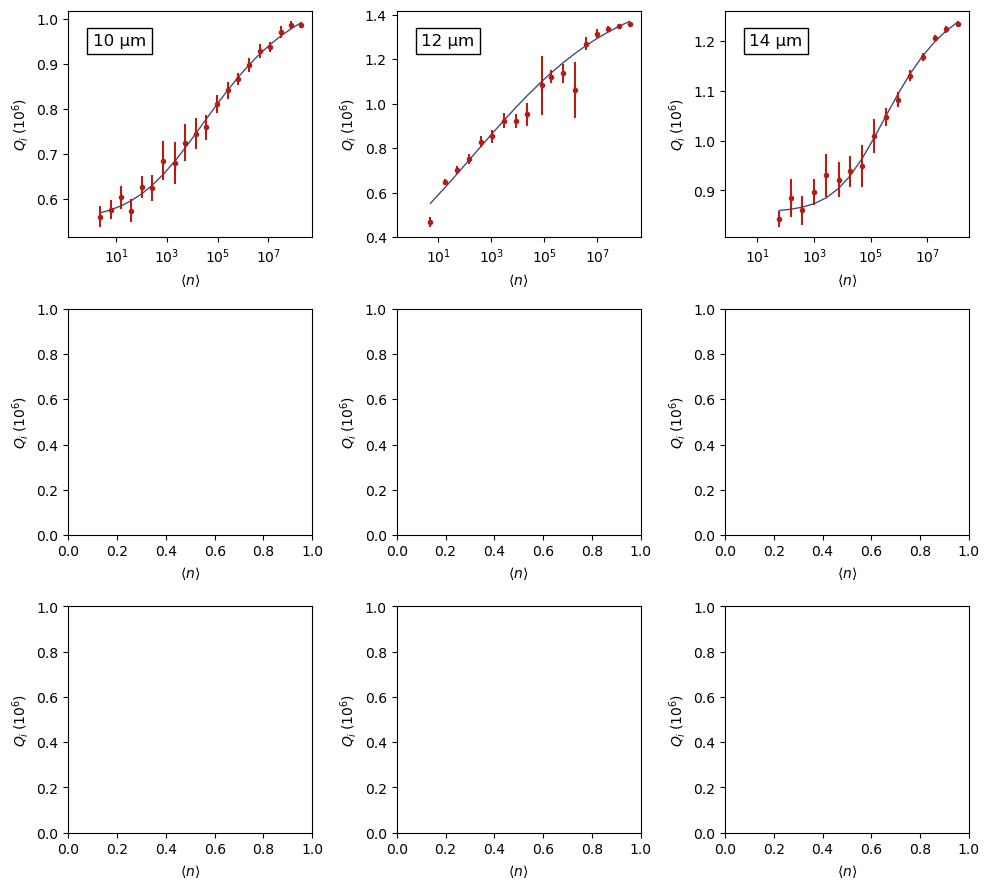

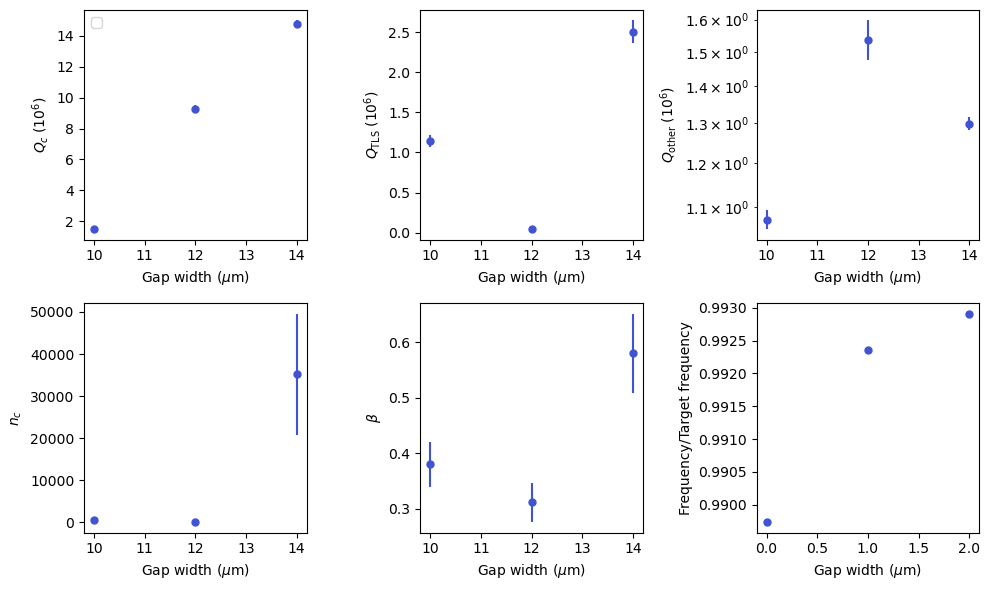

In [26]:
max_photon = [2e8, 2e8,2e8]
min_photon = [1, 5,1]
params = ana_tls.fit_qi2(df_full, img_pth, name=img_name, max_photon_vec=max_photon, min_photon_vec=min_photon) 
ana_tls.plot_res_pars2([params], [''],img_pth, name=img_name)


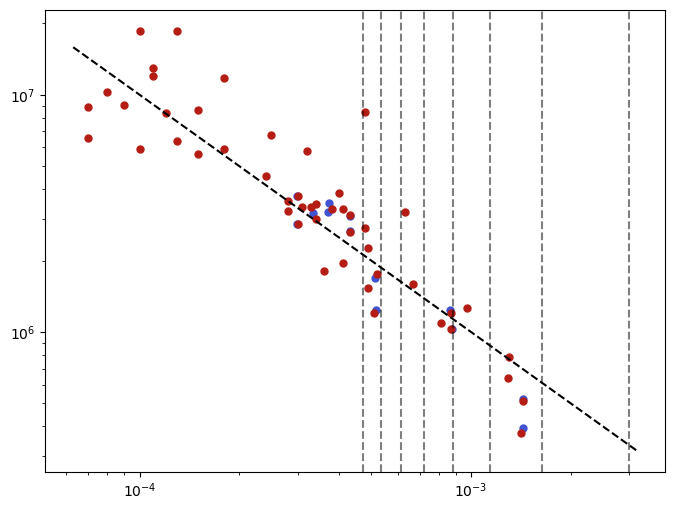

In [ ]:
x = [0.00036990239164887763, 0.0014368917119115046, 0.001429607746550472, 0.0008751431812965301, 0.000865550046843497, 0.0005155470395658258, 0.0005114686663416372, 0.00043056033160962645, 0.00043056033160962645, 0.0003718525159370362, 0.0003337186438834933, 0.0002986335134818779, 0.00029912009857014624]
y = [3199476.9679203234, 523409.6517800679, 393475.51619804575, 1030998.748068105, 1243853.6983929225, 1235381.4105004426, 1689069.4424880773, 2671166.542316509, 3089992.712867936, 3508599.0035082772, 3159757.150709801, 2850573.3801022763, 3748945.8877223744]


x2 = [0.00009, 0.00032, 0.00097, 0.00011, 0.00011, 0.0001, 0.00013, 0.00007, 0.00008, 0.00007, 0.0001, 0.00012, 0.00013, 0.00015, 0.00015, 0.00018, 0.00018, 0.00025, 0.00024, 0.0013, 0.00129, 0.00143, 0.00141, 0.00087, 0.00087, 0.00081, 0.00067, 0.00063, 0.00051, 0.00052, 0.00049, 0.00049, 0.00048, 0.00043, 0.00043, 0.00041, 0.0004, 0.00048, 0.00038, 0.00034, 0.00041, 0.00036, 0.00034, 0.00033, 0.00031, 0.0003, 0.0003, 0.00028, 0.00028]
y2 = [9013201.20082, 5790538.21943, 1261345.40188, 11973796.14265, 12962155.61582, 18577652.10067, 18616223.15763, 8884654.29209, 10261070.24139, 6570998.3701, 5922118.10406, 8393052.37571, 6372163.42882, 5652755.70338, 8604565.41868, 11754166.18162, 5922800.52107, 6772395.07536, 4556683.60321, 785982.4412, 637069.51294, 514015.02415, 375963.73459, 1033821.05094, 1206891.02229, 1088631.09215, 1597851.00528, 3190581.85915, 1197425.60461, 1751201.47125, 1526111.70012, 2255421.36328, 2741774.24837, 2645363.7895, 3121010.61696, 3291277.26924, 3846988.90802, 8449656.0796, 3313219.49822, 3450893.92262, 1957160.10875, 1812585.8367, 3002718.33264, 3349300.60915, 3349300.60915, 3733161.08995, 2856910.13996, 3240102.87121, 3579410.51526]
plt.figure(figsize=(8, 6))
plt.loglog(x, y, '.')
plt.loglog(x2, y2, '.')
def loss_func(x, a, b):
    return a * x ** b
psm_list = [0.00300331184302251,
 0.0016319413879291,
 0.0011387690001150033,
 0.0008811134271734725,
 0.0007216677625369413,
 0.00061281298886345,
 0.0005335467048377037,
 0.0004731280801911976]
for psm in psm_list:
    plt.axvline(psm, color='k', linestyle='--', alpha=0.5)

def loss_func(x, a, b):
    return a * x ** b
x = np.logspace(-4.2,-2.5)
plt.plot(x, loss_func(x, 1000, -1), color='k', linestyle='--', label='fit')

In [56]:
loss_func(0.0004, 1000, -1)

2500000.0

In [ ]:
# list for sapphire: 
psm_sapphire = [0.002015198967887038,
 0.0010940434226339134,
 0.0007630732567882886,
 0.0005902436806621539,
 0.00048332643752858683,
 0.00041035127462427573,
 0.0003572223716308697,
 0.0003167328250036756]

In [ ]:
# Imec ; 4.5 um gap and 10 um pin 